In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pybmds
from pybmds.stats.jonckheere_normal import jonckheere, Hypothesis


To run the Jonckheere-Terpstra trend test on a single dataset with a strong apparent trend, first load an individual response continuous dataset:

In [139]:
# Load the CSV file (make sure JT_strong_trend.csv is in the same directory)
dataset1 = pd.read_csv("JT_strong_trend.csv")

print(df.head())


   Doses  Response
0      0      6.71
1      0      5.33
2      0      7.04
3      0      8.94
4      0      5.12


To visualize the data, you can plot a scatterplot of the individual responses:

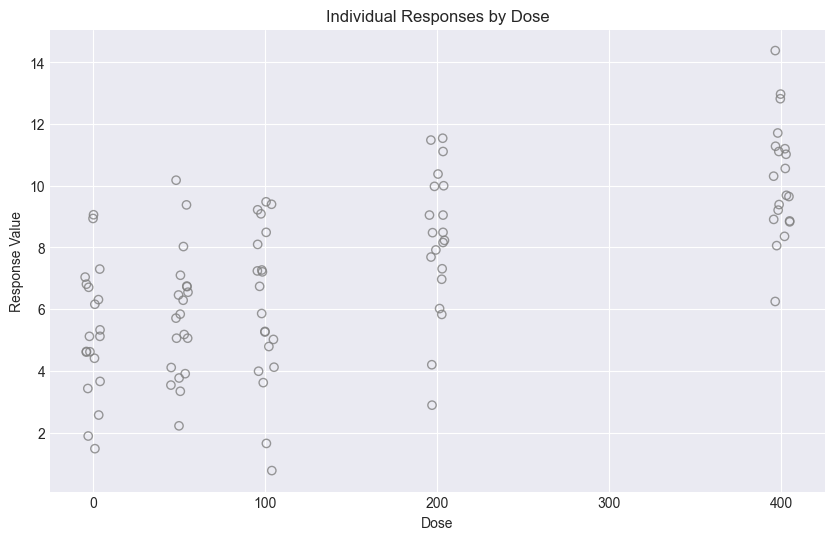

In [140]:
doses = sorted(dataset1['Doses'].unique())

plt.figure(figsize=(10,6))

for i, dose in enumerate(doses):
    actual_responses = dataset1[dataset1['Doses'] == dose]['Response']
    jittered_x = dose + np.random.uniform(-5, 5, size=len(actual_responses))
    plt.scatter(jittered_x, actual_responses, label=f'Dose {dose}', alpha=0.8, facecolors="none", edgecolors="grey")
    

plt.title('Individual Responses by Dose')
plt.xlabel('Dose')
plt.ylabel('Response Value')
plt.grid(True)
plt.show()


To actually run the Jonckheere-Terpstra trend test, call the "jonckheere" function.  Given this dataset has responses that increase with increasing dose, the "Hypothesis" variable is set to "increasing".  The Jonckheere-Terpstra trend test in pybmds uses a normal approximation.

In [141]:
result = jonckheere(
    x=dataset1["Response"].values,
    group=dataset1["Doses"].values,
    hypothesis=Hypothesis.increasing,
)

print("JT Statistic:", result.statistic)
print(f"p-value: {result.p_value:.5e}")
print("Hypothesis:", result.hypothesis)

JT Statistic: 3065.0
p-value: 4.54426e-11
Hypothesis: increasing


Often, only summary continuous data (reported as means and standard deviations) is available to risk assessors.  The Jockheere-Terpstra trend test can stil be applied to such data after synthetic data is generated.  First, load and plot a summary dataset:

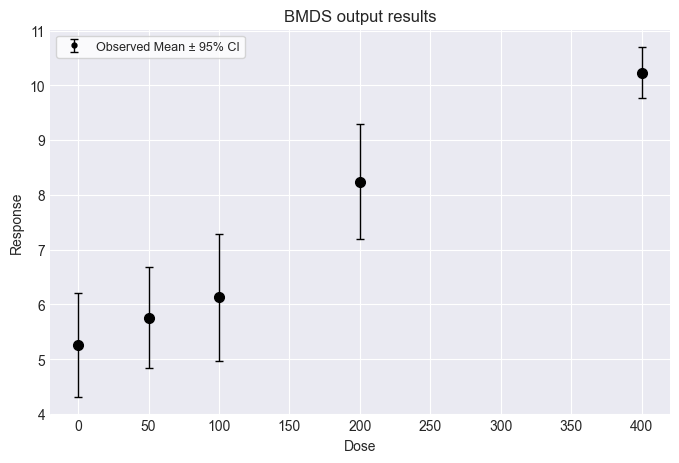

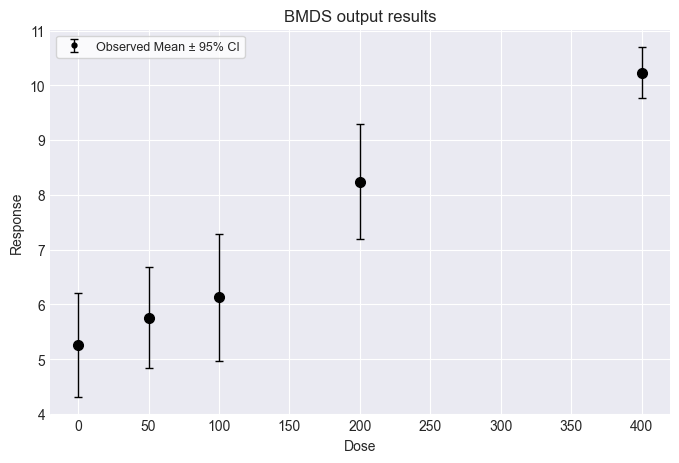

In [142]:
dataset2 = pybmds.ContinuousDataset(
    doses=[0, 50, 100, 200, 400],
    ns=[20, 20, 20, 20, 20],
    means=[5.26, 5.76, 6.13, 8.24, 10.23],
    stdevs=[2.03, 1.97, 2.47, 2.24, 1,8],
)
dataset.plot()


The "simulate_individual_dataset" function can be used to generate synthetic, individual response data from summary statistics.  This function uses a normal approximation to generate synthetic individual responses that would generate the observed summary statistics loaded by the user.  The user can set a specific random seed to facilitate reproducibility as well as impose positivity (i.e., insure that all synthetic responses are positive numbers), a tolerance for checking how close the generated summary statistics match the observed values, and the maximum iterations for the function.  

In [143]:
individual_responses = dataset2.simulate_individual_dataset(
    seed = 2001,
    impose_positivity = True,
    tolerance = 0.01,
    max_iterations = 100000,
)

data = list(zip(individual_responses.individual_doses, individual_responses.responses))

# Make the DataFrame from the zipped data
results_df = pd.DataFrame(data, columns=['Dose', 'Response'])

print(results_df.to_string(index=False))

 Dose  Response
    0  5.747758
    0  3.222272
    0  8.476505
    0  3.289254
    0  6.640436
    0  3.145300
    0  2.588325
    0  4.268821
    0  3.814577
    0  3.741218
    0  9.289510
    0  6.661899
    0  8.037202
    0  5.486049
    0  5.922800
    0  7.424193
    0  3.795374
    0  2.647892
    0  7.038364
    0  3.962251
   50  6.233341
   50  3.782501
   50  8.881436
   50  3.847502
   50  7.099635
   50  3.707804
   50  3.167290
   50  4.798117
   50  4.357299
   50  4.286108
   50  9.670412
   50  7.120463
   50  8.455117
   50  5.979367
   50  6.403210
   50  7.860226
   50  4.338664
   50  3.225097
   50  7.485802
   50  4.500609
  100  6.723479
  100  3.650597
  100 10.043678
  100  3.732097
  100  7.809644
  100  3.556942
  100  2.879242
  100  4.923985
  100  4.371284
  100  4.282023
  100 11.032902
  100  7.835759
  100  9.509157
  100  6.405044
  100  6.936461
  100  8.763279
  100  4.347918
  100  2.951721
  100  8.293823
  100  4.550966
  200  8.778215
  200  5

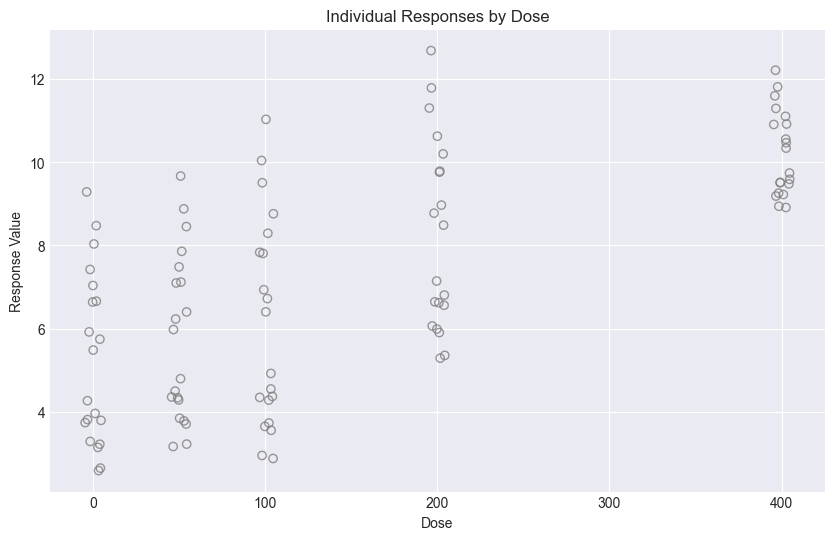

In [145]:
doses = sorted(results_df['Dose'].unique())

plt.figure(figsize=(10,6))

for i, dose in enumerate(doses):
    actual_responses = results_df[results_df['Dose'] == dose]['Response']
    jittered_x = dose + np.random.uniform(-5, 5, size=len(actual_responses))
    plt.scatter(jittered_x, actual_responses, label=f'Dose {dose}', alpha=0.8, facecolors="none", edgecolors="grey")
    

plt.title('Individual Responses by Dose')
plt.xlabel('Dose')
plt.ylabel('Response Value')
plt.grid(True)
plt.show()

Now that synthetic individual responses have been generated from the observed summary statistics, the Jonckheere-Terpstra trend test can be run to determine whether there is a monotonically increasing trend.

In [146]:
result = jonckheere(
    x=results_df["Response"].values,
    group=results_df["Dose"].values,
    hypothesis=Hypothesis.increasing,
)

print("JT Statistic:", result.statistic)
print(f"p-value: {result.p_value:.5e}")
print("Hypothesis:", result.hypothesis)


JT Statistic: 3078.0
p-value: 2.68140e-11
Hypothesis: increasing
